# Final Project

William Nayden and Quynh Chau

# 1 INTRODUCTION

The purpose of this analysis is to predict Class 1 and Class 0 categories for the data set given with the goal of minimizing
dollar losses due to misclassifications.  For each false positive, there is an associated loss of **\\$225** and for each false 
negative, there is an associated loss of **\\$35**.

For purposes of this classification, positive is class 1 and negative is class 0.

# 2 METHODS

## A. Data Preparation

The data set was downloaded from https://smu.box.com/s/k9x193jxm39enje2wx8ouw2kopx33132 in .csv format. 

There are 160,000 rows and 51 columns (features). 46 features are numeric and five features are categorical.  Nonnumeric features 'x24', 'x29', 'x30' contained categorical values of continental regions (Europe, Asia, America), calendar month, and calendar day of the week, respectively.  

Missing data for these three features was imputed using a new factor level for each feature.  For example, missing values for feature `x24` had the imputed value of `NOregion`.  Similarly, missing values for feature `x29` had the imputed value of `NOmonth`, and lastly, missing values for feature `x30` had the imputed value of `NOday`.  The remaining features, `x32` and `x37` were numerical values containing `$` and `%`.  These two characters were stripped from their respective values and these features were converted to numerical types.

For numerical features with missing values, the median of their respective range of values were imputed.  The median was chosen rather than the mean or mode to minimize the impact of outliers and to not create any artificial imbalance within the data set.

## B. Model Selection

XGBoost Classifier with hypeparameter tuning was used to build the classification model.  Hyperparameter tuning was done for `max_weight` and `min_child_weight` parameters.

We chose XGBoost Classifier because for classification problems like this one, we believe the accuracy of tree based algorithms provides better accuracy than linear algorithms because they are better at recognizing non-linear relationships. Additionally, compared to Random Forest, XGBoost provides faster run times for similar accuracies, making the model more scalable.

For modeling and evaluation purposes, a baseline XGBoost Classifier model was done using train/test/split with 80/20 for purposes of establishing a point for comparison of model performance.  Evaluation metrics include accuracy and log loss, with calculation for dollar loss impact from misclassifications.  In addition, two models using XGBoost Classifier were ran using imputed data and also excluding all missing data for purposes of comparing model performance.

The top 10 important features were plotted using plot_importance and ranked by F-score.


# 3 RESULTS

Results for the XGBoost Classifier Models are in the following table:  

|Model|Accuracy|Log Loss|Total Rounds|
|:-----|--------|--------|----------:|
|XGBoost-Excl. Missing Data|93%|2.8953|129|
|XGBoost-Imputed Data|95%|1.6261|53|

Hyperparameter tuning and cross validation grid search showed that the best values to use for xgBoost Classifier were 
`max_weight = 9`, `min_child_weight = 6`.  

The estimated dollar loss for `XGBoost - Excluding Missing Data` was extrapolated from the results of the confusion matrix
generated from 20% of the train/test split data set.  

|Model|Estimated \\$ Loss|
|:---|---:|
|XGBoost-Excl. Missing Data|\\$1,414,475|
|XGBoost-Imputed Data|\\$860,825|

As seen in the table above, the `XGBoost-Imputed Data` model provides an estimated savings of **\\$553,650** over the `XGBoost-Excl. Missing Data` model.

The top ten most important features using F-score ranking are plotted in the following graph.  High F score indicates a relatively higher degree of feature importance in the classification algorithm.

<Figure size 432000x720000 with 0 Axes>

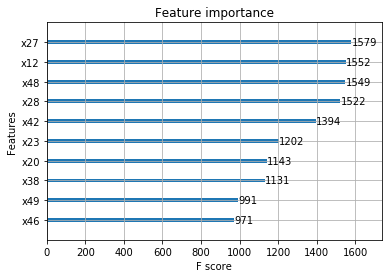

In [165]:
#Plot Top 10 Most Important Features based on  F-score
from matplotlib import pyplot as plt
from xgboost import plot_importance

fig= plt.figure(figsize=(6000,10000))
plot_importance(model2, max_num_features=10)
plt.show()

We believe feature importance is crucial for further development of this model, as it will help us create new features by looking at the interactions and covariance of important features. While we did not do this in this version of the model, it represents opportunity for further research, as enumerated by this graph.

Additionally, with further context, this can help further elucidate the business case and real world insights for this model. While these features have generic labels now, more descriptive feature labeling can help craft the narrative story for what is important in this classification model.

# 4 CONCLUSION

We recommend using our `XGBoost-Imputed Data` model to help classify this data. It provides the highest accuracy, lowest log loss, lowest run time, but most importantly fewest dollars lost of all the models we tested.

Additionally, we found both hyperparameter tuning, and imputing missing data served as vehicles for huge improvements in all of our KPIs.

For further research, we would recommend exploring further feature creation, using our feature importance graph as a starting point. Additionally, we believe ensembling methods could provide marginal accuracy gains to reduce the number of misclassifications by the model.

# APPENDIX : CODE AND MODELS

## Data Import and Packages

In [79]:
import os as os 
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [80]:
os.getcwd()

'C:\\SMU\\DS 7333 Quant the World\\Case Studies\\Case Study wk 14 and Final'

In [81]:
os. chdir('C:/SMU/DS 7333 Quant the World/Case Studies/Case Study wk 14 and Final')

In [82]:
df1 = pd.read_csv("final_project.csv")
print ("This data set has {} rows and {} columns".format(df1.shape[0],df1.shape[1]))


This data set has 160000 rows and 51 columns


In [83]:
print (df1.isnull().sum())

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64


In [84]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

In [85]:
df1.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


## Categorical Variables:  Create New Factor Level, Detect Missing Data and Impute

In [86]:
df1.x24.unique()

array(['euorpe', 'asia', 'america', nan], dtype=object)

In [87]:
df1['x24']= df1['x24'].astype(str).str.replace('nan','NOregion')


In [88]:
df1.x24.unique()

array(['euorpe', 'asia', 'america', 'NOregion'], dtype=object)

In [89]:
df1.x29.unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

In [90]:
df1['x29']=df1['x29'].astype(str).str.replace('nan','NOmonth')
df1.x29.unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct',
       'NOmonth', 'Mar', 'Feb', 'Dev', 'January'], dtype=object)

In [91]:
df1.x30.unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan],
      dtype=object)

In [92]:
df1['x30']=df1['x30'].astype(str).str.replace('nan','NODay')
df1.x30.unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', 'NODay'],
      dtype=object)

In [93]:
df1.x32.unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [94]:
# dropping "%"
df1['x32'] = df1['x32'].astype(str).str.replace('%', '')

In [95]:
df1.x32.unique()

array(['0.0', '-0.02', '-0.01', '0.01', '-0.03', '0.02', '-0.0', '-0.04',
       'nan', '0.03', '0.04', '-0.05', '0.05'], dtype=object)

In [96]:
df1['x32']= df1['x32'].astype(str).str.replace('nan','0.0')

In [97]:
df1["x32"] = pd.to_numeric(df1["x32"])

In [98]:
df1.x32.unique()

array([ 0.  , -0.02, -0.01,  0.01, -0.03,  0.02, -0.04,  0.03,  0.04,
       -0.05,  0.05])

In [99]:
df1.x37.unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [100]:
# dropping "$"
df1['x37'] = df1['x37'].astype(str).str.replace('$', '')

In [101]:
df1['x37']= df1['x37'].astype(str).str.replace('nan','0.0')

In [102]:
df1["x37"] = pd.to_numeric(df1["x37"])

In [103]:
df1.x37.unique()

array([ 1313.96,  1962.78,   430.47, ...,  1588.65,   439.21, -1229.34])

## Impute Missing Numerical Feature Values with Median Values

In [104]:
# Impute missing values in each column/feature of numerical data type with the median value for that column feature
df1.fillna(df1.median(), inplace=True)

In [105]:
# Confirm that all missing data have been imputed
df1.isnull().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

## XGBoostClassifier Model with Imputed Data

In [106]:
#One hot encode categorical features
from sklearn.preprocessing import LabelEncoder

df1[['x24','x29','x30']] = df1[['x24','x29','x30']].apply(LabelEncoder().fit_transform)
print(df1[['x24','x29','x30']])

        x24  x29  x30
0         3    5    4
1         2    1    5
2         2    5    5
3         2    5    5
4         2    5    4
...     ...  ...  ...
159995    2    1    5
159996    2    8    5
159997    2    6    5
159998    2    8    5
159999    2    1    4

[160000 rows x 3 columns]


In [107]:
target1 = df1['y']
df1.drop(['y'],inplace=True, axis=1)

In [108]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1, target1, test_size=test_size, random_state=seed)

In [109]:
xgtrain1 = xgb.DMatrix(X_train1.values, y_train1.values)
xgtest1 = xgb.DMatrix(X_test1.values, y_test1.values)

In [110]:
dtrain1 = xgb.DMatrix(X_train1, label=y_train1)
dtest1 = xgb.DMatrix(X_test1, label=y_test1)

C:\Users\Owner\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [111]:
# "Learn" the mean from the training data
mean_train1 = np.mean(y_train1)
# Get predictions on the test set
baseline_predictions1 = np.ones(y_test1.shape) * mean_train1

# Compute Log Loss and Accuracy
log_baseline1 = log_loss(y_test1, baseline_predictions1)
acc_baseline1 = accuracy_score(y_test1, np.ones(baseline_predictions1.shape))

print("Imputed Model Baseline Accuracy is {:.2f}".format(acc_baseline1))
print("Imputed Baseline Log Loss is {:.2f}".format(log_baseline1))

Imputed Model Baseline Accuracy is 0.40
Imputed Baseline Log Loss is 0.67


In [112]:
# fit model no training data
model1 = xgb.XGBClassifier()
model1.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [116]:
# make predictions for test data
y_pred1 = model1.predict(X_test1)
predictions1 = [round(value) for value in y_pred1]

In [117]:
# evaluate predictions
accuracy1 = accuracy_score(y_test1, predictions1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

Accuracy: 83.84%


In [118]:
# evaluate predictions
cm1 = confusion_matrix(y_test1, predictions1)
print(cm1)

[[17157  1950]
 [ 3222  9671]]


In [119]:
total_loss1 = (1950*225) + (3222*35)
formatted = "${:,.2f}".format(total_loss1)
print(formatted)

$551,520.00


In [120]:
params1 = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:hinge',
}

In [121]:
params1['eval_metric'] = "error"

In [122]:
num_boost_round = 999

model1 = xgb.train(
    params1,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtest1, "Test1")],
    early_stopping_rounds=10
)

[0]	Test1-error:0.597094
Will train until Test1-error hasn't improved in 10 rounds.
[1]	Test1-error:0.532375
[2]	Test1-error:0.281625
[3]	Test1-error:0.221938
[4]	Test1-error:0.203031
[5]	Test1-error:0.1915
[6]	Test1-error:0.186312
[7]	Test1-error:0.178062
[8]	Test1-error:0.167469
[9]	Test1-error:0.162687
[10]	Test1-error:0.152531
[11]	Test1-error:0.146219
[12]	Test1-error:0.142438
[13]	Test1-error:0.137938
[14]	Test1-error:0.136469
[15]	Test1-error:0.1325
[16]	Test1-error:0.128969
[17]	Test1-error:0.126375
[18]	Test1-error:0.125563
[19]	Test1-error:0.122969
[20]	Test1-error:0.121437
[21]	Test1-error:0.1165
[22]	Test1-error:0.113781
[23]	Test1-error:0.110125
[24]	Test1-error:0.108625
[25]	Test1-error:0.10675
[26]	Test1-error:0.105719
[27]	Test1-error:0.104031
[28]	Test1-error:0.103844
[29]	Test1-error:0.104
[30]	Test1-error:0.103625
[31]	Test1-error:0.102875
[32]	Test1-error:0.10075
[33]	Test1-error:0.098312
[34]	Test1-error:0.095469
[35]	Test1-error:0.093281
[36]	Test1-error:0.091781


In [123]:
print("Imputed Model Best Accuracy: {:.2f} with {} rounds".format(
                 (1-model1.best_score),
                 model1.best_iteration+1))

Imputed Model Best Accuracy: 0.93 with 99 rounds


In [124]:
cv_results1 = xgb.cv(
    params1,
    dtrain1,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'logloss','error'},
    early_stopping_rounds=10
)
cv_results1

,train-error-mean,train-error-std,train-logloss-mean,train-logloss-std,test-error-mean,test-error-std,test-logloss-mean,test-logloss-std
0,0.599188,0.000612,22.076522,0.022470,0.599188,0.002446,22.074753,0.090034
1,0.535330,0.034381,19.726219,1.266066,0.536312,0.034032,19.759317,1.253452
2,0.272805,0.006886,10.047016,0.253710,0.278969,0.006177,10.278046,0.227589
3,0.224490,0.002205,8.268337,0.081187,0.229914,0.002947,8.470688,0.108583
4,0.202109,0.002087,7.444442,0.076810,0.207688,0.001913,7.651778,0.070479
...,...,...,...,...,...,...,...,...
122,0.050853,0.003024,1.873582,0.111433,0.079891,0.002634,2.943263,0.097030
123,0.050711,0.003193,1.868329,0.117637,0.079765,0.002761,2.938657,0.101714
124,0.050633,0.003195,1.865451,0.117702,0.079773,0.002595,2.938945,0.095590
125,0.050508,0.003299,1.860845,0.121555,0.079688,0.002759,2.935779,0.101641


In [126]:
print('Imputed Model Best Accuracy: {}'.format(1-cv_results1['test-error-mean'].min()))
print('Imputed Model Best Log Loss: {}'.format(cv_results1['test-logloss-mean'].min()))

Imputed Model Best Accuracy: 0.920328
Imputed Model Best Log Loss: 2.9352028


In [127]:
gridsearch_params1 = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [128]:
# Define initial best params and accuracy
min_error1= float("Inf")
best_params1 = None
for max_depth, min_child_weight in gridsearch_params1:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params1['max_depth'] = max_depth
    params1['min_child_weight'] = min_child_weight
    # Run CV
    cv_results1 = xgb.cv(
        params1,
        dtrain1,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss', 'error'},
        early_stopping_rounds=10
    )
    # Update best Log Loss
    mean_logloss1 = cv_results1['test-logloss-mean'].min()
    mean_error1 = cv_results1['test-error-mean'].min()
    boost_rounds = cv_results1['test-error-mean'].argmin()
    print("Imputed Model \Log Loss {} for {} rounds".format(mean_logloss1, boost_rounds))
    print("Imputed Model \Accuracy {} for {} rounds".format((1-mean_error1), boost_rounds))
    if mean_error1 < min_error1:
        min_error1 = mean_error1
        best_params1 = (max_depth,min_child_weight)
print("Imputed Model Best params: {}, {}, Log Loss: {}, Accuracy: {}".format(best_params1[0], best_params1[1], mean_logloss1,(1-min_error1)))

CV with max_depth=9, min_child_weight=5


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Imputed Model \Log Loss 2.8120065999999997 for 53 rounds
Imputed Model \Accuracy 0.9236718 for 53 rounds
CV with max_depth=9, min_child_weight=6
Imputed Model \Log Loss 2.8341702 for 42 rounds
Imputed Model \Accuracy 0.9230704 for 42 rounds
CV with max_depth=9, min_child_weight=7
Imputed Model \Log Loss 2.8456842 for 46 rounds
Imputed Model \Accuracy 0.9227578 for 46 rounds
CV with max_depth=10, min_child_weight=5
Imputed Model \Log Loss 2.8756194 for 39 rounds
Imputed Model \Accuracy 0.9219452 for 39 rounds
CV with max_depth=10, min_child_weight=6
Imputed Model \Log Loss 2.8546068 for 31 rounds
Imputed Model \Accuracy 0.9225156 for 31 rounds
CV with max_depth=10, min_child_weight=7
Imputed Model \Log Loss 2.8266864000000003 for 30 rounds
Imputed Model \Accuracy 0.9232734 for 30 rounds
CV with max_depth=11, min_child_weight=5
Imputed Model \Log Loss 2.8974958 for 24 rounds
Imputed Model \Accuracy 0.9213515999999999 for 24 rounds
CV with max_depth=11, min_child_weight=6
Imputed Model \L

## Fit XGBoostClassifier with Results from CV Grid Search Using max_depth =9, min_child_weight=6


In [129]:
# fit model no training data
model2 = xgb.XGBClassifier(max_depth =9, min_child_weight = 6, random_state = 0, verbosity=1)
model2.fit(df1, target1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=6, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [130]:
# make predictions for test data
y_pred2 = model2.predict(df1)
predictions2 = [round(value) for value in y_pred2]

In [131]:
# evaluate predictions
accuracy2 = accuracy_score(target1, predictions2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))

Accuracy: 95.29%


In [146]:
# evaluate predictions
cm2 = confusion_matrix(target1, predictions2)
print(cm2)



[[92660  3143]
 [ 4390 59807]]


In [138]:
total_loss2 = (3143*225) + (4390*35)
formatted = "${:,.2f}".format(total_loss1)
print(formatted)

$860,825.00


In [147]:
model2_log_loss = log_loss(target1, predictions2)
print(model2_log_loss)

1.6261444732349086


<Figure size 432000x720000 with 0 Axes>

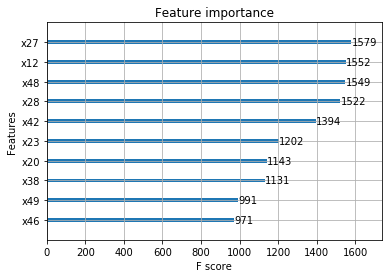

In [165]:
#Plot Top 10 Most Important Features based on  F-score
from matplotlib import pyplot as plt
from xgboost import plot_importance

fig= plt.figure(figsize=(6000,10000))
plot_importance(model2, max_num_features=10)
plt.show()

## Model with Original Data Excluding Missing Values

In [55]:
df = df.dropna()
target = df['y']
df.drop(['y'],inplace=True, axis=1)

In [57]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,x24,x29,x30,x32,x37
0,euorpe,July,tuesday,0.0%,$1313.96
1,asia,Aug,wednesday,-0.02%,$1962.78
2,asia,July,wednesday,-0.01%,$430.47
3,asia,July,wednesday,0.01%,$-2366.29
4,asia,July,tuesday,0.01%,$-620.66


In [58]:
def per(x):
    return float(x.strip('%'))

df['x32'] = df['x32'].apply(per)
print(df['x32'])

0         0.00
1        -0.02
2        -0.01
3         0.01
4         0.01
          ... 
159995    0.00
159996   -0.01
159997   -0.00
159998   -0.02
159999    0.02
Name: x32, Length: 158392, dtype: float64


In [59]:
def dol(x):
    return float(x.strip('$'))

df['x37'] = df['x37'].apply(dol)
print(df['x37'])

0         1313.96
1         1962.78
2          430.47
3        -2366.29
4         -620.66
           ...   
159995    -891.96
159996    1588.65
159997     687.46
159998     439.21
159999   -1229.34
Name: x37, Length: 158392, dtype: float64


In [65]:
from sklearn.preprocessing import LabelEncoder

df[['x24','x29','x30']] = df[['x24','x29','x30']].apply(LabelEncoder().fit_transform)
print(df[['x24','x29','x30']])

        x24  x29  x30
0         2    5    3
1         1    1    4
2         1    5    4
3         1    5    4
4         1    5    3
...     ...  ...  ...
159995    1    1    4
159996    1    8    4
159997    1    6    4
159998    1    8    4
159999    1    1    3

[158392 rows x 3 columns]


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

## XGBoost Model

In [67]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=test_size, random_state=seed)

In [68]:
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)

In [69]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [70]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

# Compute Log Loss and Accuracy
log_baseline = log_loss(y_test, baseline_predictions)
acc_baseline = accuracy_score(y_test, np.ones(baseline_predictions.shape))

print("Baseline Accuracy is {:.2f}".format(acc_baseline))
print("Baseline Log Loss is {:.2f}".format(log_baseline))

Baseline Accuracy is 0.40
Baseline Log Loss is 0.67


In [71]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [73]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.43%


In [75]:
# evaluate predictions
cm = confusion_matrix(y_test, predictions)
print(cm)

[[17821  1047]
 [ 1352 11459]]


In [79]:
total_loss = (1047*225) + (1352*35)
formatted = "${:,.2f}".format(total_loss)
print(formatted)

$282,895.00


In [80]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'binary:hinge',
}

In [81]:
params['eval_metric'] = "error"

In [83]:
num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-error:0.59560
[1]	Test-error:0.52628
[2]	Test-error:0.26383
[3]	Test-error:0.22052
[4]	Test-error:0.20559
[5]	Test-error:0.19499
[6]	Test-error:0.18549
[7]	Test-error:0.17071
[8]	Test-error:0.16304
[9]	Test-error:0.15717
[10]	Test-error:0.15357
[11]	Test-error:0.14991
[12]	Test-error:0.14262
[13]	Test-error:0.13801
[14]	Test-error:0.13548
[15]	Test-error:0.13372
[16]	Test-error:0.12983
[17]	Test-error:0.12904
[18]	Test-error:0.12545
[19]	Test-error:0.12431
[20]	Test-error:0.12210
[21]	Test-error:0.12011
[22]	Test-error:0.11992
[23]	Test-error:0.11916
[24]	Test-error:0.11784
[25]	Test-error:0.11326
[26]	Test-error:0.10922
[27]	Test-error:0.10673
[28]	Test-error:0.10398
[29]	Test-error:0.10275
[30]	Test-error:0.10127
[31]	Test-error:0.09994
[32]	Test-error:0.09782
[33]	Test-error:0.09754
[34]	Test-error:0.09666
[35]	Test-error:0.09514
[36]	Test-error:0.09454
[37]	Test-error:0.09385
[38]	Test-error:0.09281
[39]	Test-error:0.09211
[40]	Test-error:0.09082
[41]	Test-error:0.09022
[4

In [84]:
print("Best Accuracy: {:.2f} with {} rounds".format(
                 (1-model.best_score),
                 model.best_iteration+1))

Best Accuracy: 0.93 with 129 rounds


In [85]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'logloss','error'},
    early_stopping_rounds=10
)
cv_results

,train-error-mean,train-error-std,train-logloss-mean,train-logloss-std,test-error-mean,test-error-std,test-logloss-mean,test-logloss-std
0,0.599607,0.001213,22.091349,0.044683,0.599607,0.004851,22.090093,0.178729
1,0.518818,0.023295,19.114787,0.858270,0.520349,0.019487,19.170089,0.717906
2,0.280171,0.007274,10.322113,0.268003,0.285006,0.006905,10.500096,0.254380
3,0.221025,0.003190,8.142972,0.117538,0.226812,0.003264,8.356120,0.120233
4,0.197040,0.002584,7.259264,0.095221,0.203278,0.003724,7.489102,0.137180
...,...,...,...,...,...,...,...,...
141,0.047523,0.002106,1.750815,0.077569,0.078840,0.002521,2.904559,0.092868
142,0.047454,0.002088,1.748271,0.076946,0.078737,0.002559,2.900779,0.094268
143,0.047397,0.002083,1.746163,0.076751,0.078713,0.002559,2.899907,0.094290
144,0.047343,0.002038,1.744200,0.075099,0.078642,0.002563,2.897290,0.094432


In [88]:
print('Best Accuracy: {}'.format(1-cv_results['test-error-mean'].min()))
print('Best Log Loss: {}'.format(cv_results['test-logloss-mean'].min()))

Best Accuracy: 0.9214132
Best Log Loss: 2.8952547999999996


In [89]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and accuracy
min_error = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss', 'error'},
        early_stopping_rounds=10
    )
    # Update best Log Loss
    mean_logloss = cv_results['test-logloss-mean'].min()
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\Log Loss {} for {} rounds".format(mean_logloss, boost_rounds))
    print("\Accuracy {} for {} rounds".format((1-mean_error), boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Log Loss: {}, Accuracy: {}".format(best_params[0], best_params[1], mean_logloss, (1-min_error)))